In [1]:
import librosa

In [14]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
seaborn.set(style='ticks')

In [15]:
import numpy as np

In [117]:
y, sr = librosa.load(librosa.util.example_audio_file(), offset=25, duration=20)

In [118]:
S, P = librosa.magphase(librosa.stft(y))

In [119]:
C = librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'))

In [120]:
odf = librosa.onset.onset_strength(y=y, sr=sr)

In [121]:
onsets = librosa.onset.onset_detect(y=y, sr=sr)

In [122]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr, trim=False)

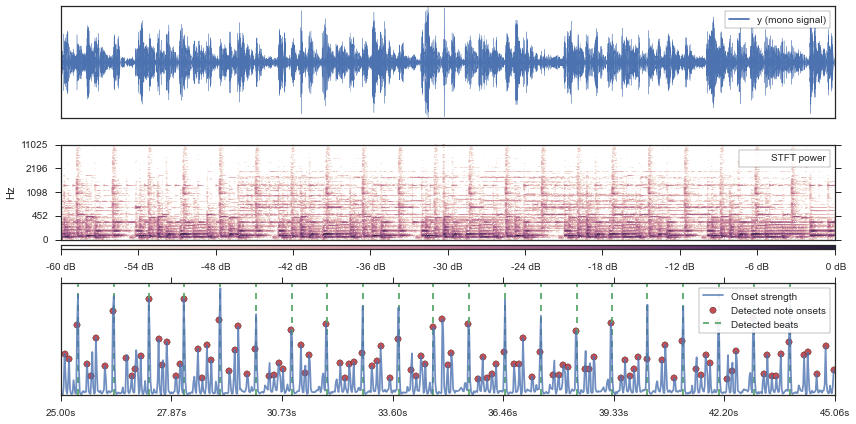

In [147]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
librosa.display.waveplot(y=y, sr=sr)
plt.xticks([])
plt.yticks([])
plt.plot([], color=seaborn.color_palette()[0], label='y (mono signal)')
plt.legend(frameon=True, framealpha=0.9, loc='best')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.logamplitude(S**2, ref_power=np.max, top_db=60), y_axis='log')
plt.colorbar(orientation='horizontal', fraction=0.1, aspect=200, format='%2.0f dB', pad=0.05)
plt.plot([], linestyle='', marker='', label='STFT power')
plt.legend(frameon=True, framealpha=0.9, loc='best')


plt.subplot(3, 1, 3)
plt.plot(odf, alpha=0.8, label='Onset strength')
plt.scatter(onsets, odf[onsets], c=seaborn.color_palette()[2], marker='o', s=40, label='Detected note onsets')
plt.vlines(beats,
           odf.min(),
           1.05 * odf.max(),
           colors=seaborn.color_palette()[1],
           linestyle='--', label='Detected beats')
plt.xlim([0, len(odf)])
plt.ylim([odf.min(), odf.max() * 1.05])
plt.yticks([])

librosa.display.time_ticks(np.linspace(0, len(odf), num=8, endpoint=True),
                           25.0 + librosa.frames_to_time(np.linspace(0, len(odf), num=8, endpoint=True),
                                                         sr=sr,
                                                         hop_length=512),
                           n_ticks=8)

plt.legend(frameon=True, framealpha=0.9)

plt.tight_layout()
plt.savefig('tour.pdf')